### AIM: Implementing Naive Bayes classifier

### Tasks:

* go to example of Naive Bayes classifier in https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.05-Naive-Bayes.ipynb

* pass through the example, make notebook,

* make own case of Naive Bayes by using some exoplanet data


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

/tmp/ipykernel_38004/1167689380.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [2]:
df = pd.read_csv('results.csv')
df = df.drop('Unnamed: 0', axis=1)

x = df[df.columns[df.columns != 'habitable']]
y = pd.DataFrame(df['habitable'])

In [3]:
x.columns

Index(['radius_p', 'p_orb', 'mass_p', 'ecc_p', 'inc_p', 'large_omega_p',
       'small_omega_p', 'theta_p', 'albedo_bond', 'albedo_geom_vis',
       'albedo_geom_mir', 'z', 'semimajor_p', 'sep_p', 'angsep', 'maxangsep',
       'flux_p', 'fp', 'temp_p', 'radius_s', 'mass_s', 'temp_s', 'distance_s',
       'ra', 'dec', 'nuniverse', 'nstar', 'stype', 'id', 'name_s', 'lon',
       'lat', 's_in', 's_out', 'l_sun', 'hz_in', 'hz_out', 'hz_center',
       'snr_1h', 'baseline', 'detected', 'snr_current', 'int_time', 't_slew'],
      dtype='object')

In [4]:
x = x.drop(['lon','lat', 'angsep', 'maxangsep', 'hz_in', 'hz_out', 'hz_center', 'snr_1h', 'baseline', 'detected', 'snr_current','id', 'int_time', 't_slew', 'ra', 'dec'], axis=1)

In [5]:
for i in range(len(y)):
    if y['habitable'][i] == 0:
        y['habitable'][i] = 'No'
    else:
        y['habitable'][i] = 'Yes'
        
yes = y['habitable'][y['habitable']=='Yes'].index
no = y['habitable'][y['habitable']=='No'].index

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

### Gaussian Naive Bayes

In [7]:
model_gauss = GaussianNB()
model_gauss.fit(x_train, y_train);

/home/meghana/miniconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
y_gauss = model_gauss.predict(x_test)

In [9]:
yprob = model_gauss.predict_proba(x_test)
yprob

array([[1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.62762588e-25],
       [1.00000000e+00, 1.57515353e-52],
       ...,
       [1.04062916e-09, 9.99999999e-01],
       [2.35948656e-01, 7.64051344e-01],
       [9.97717597e-01, 2.28240302e-03]])

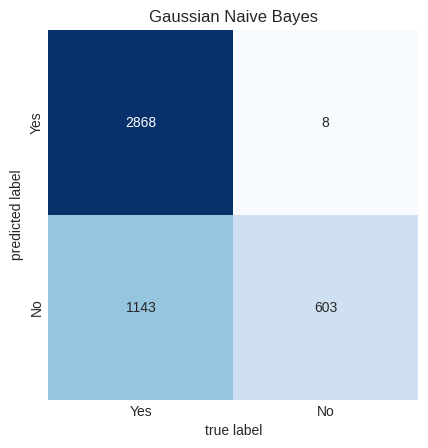

In [10]:
mat = confusion_matrix(y_test, y_gauss)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=y_train['habitable'].unique(), yticklabels=y_train['habitable'].unique(),
            cmap='Blues')
plt.title('Gaussian Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label');

### Multinomial Naive Bayes

In [11]:
model_mn = MultinomialNB() 
#help(MultinomialNB())

In [12]:
model_mn.fit(x_train, y_train)
y_mn = model_mn.predict(x_test)

/home/meghana/miniconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


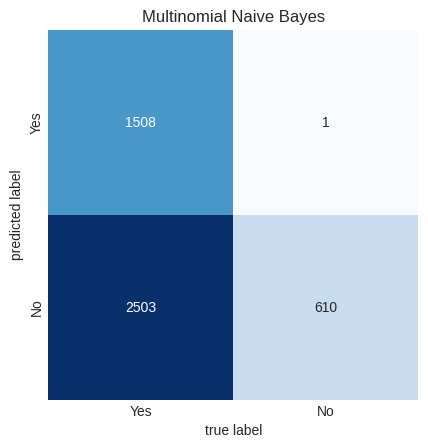

In [13]:
mat = confusion_matrix(y_test, y_mn)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=y_train['habitable'].unique(), yticklabels=y_train['habitable'].unique(),
            cmap='Blues')
plt.title('Multinomial Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label');

In [14]:
x.columns

Index(['radius_p', 'p_orb', 'mass_p', 'ecc_p', 'inc_p', 'large_omega_p',
       'small_omega_p', 'theta_p', 'albedo_bond', 'albedo_geom_vis',
       'albedo_geom_mir', 'z', 'semimajor_p', 'sep_p', 'flux_p', 'fp',
       'temp_p', 'radius_s', 'mass_s', 'temp_s', 'distance_s', 'nuniverse',
       'nstar', 'stype', 'name_s', 's_in', 's_out', 'l_sun'],
      dtype='object')

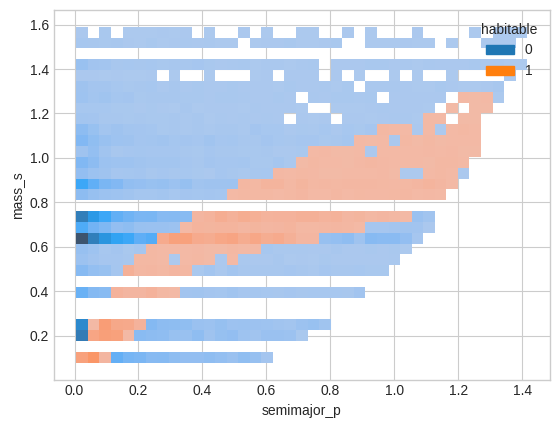

In [19]:
sns.histplot(data=df, y='mass_s', x='semimajor_p', hue='habitable')
plt.show()

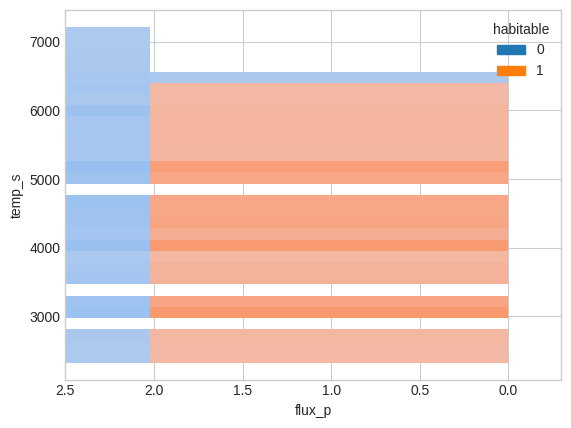

In [16]:
sns.histplot(data=df, y='temp_s', x='flux_p', hue='habitable')
plt.xlim(2.5,-0.3)

plt.show()